In [1]:
import subprocess
from pybars import Compiler
import arguebuf as ab
compiler = Compiler()

def _list(this, options, items):
    result = []
    for item in items:
        result.append(options['fn'](item))
        result.append('\n')
    return result

def get_color(node_label):
    if node_label == "Support":
        return "green"
    elif node_label == "Attack":
        return "red"
    return "blue"

def get_shape(node_label):
    if node_label == "Support":
        return "box"
    elif node_label == "Attack":
        return "diamond"
    return "ellipse"


def export_graph(inp: ab.Graph, file: str, layout_engine="dot", return_str = False):
    source = """
        digraph "" {
        #nodesep=0.02
        #layersep=0.02
        #ranksep=0.02
        node [height=1.2,
            label="",
            style=filled,
            width=1.2,
            shape=ellipse,
            penwidth=0,
            color=blue
        ];
        sep=-10
        edge [arrowhead=none,
            style=tapered
        ];
        {{#list nodes}}"{{id}}" [color="{{color}}" shape="{{shape}}"] {{/list}}
        {{#list edges}}"{{source}}" -> "{{target}}" {{/list}}
    }
    """
    template = compiler.compile(source)
    helpers = {
        'list': _list,
    }
    output = template({'nodes': [{"id": node.id, "color": get_color(node.label), "shape": get_shape(node.label)} for node in inp.nodes.values()], 'edges': [{"source": edge.source.id, "target": edge.target.id} for edge in inp.edges.values()]}, helpers=helpers)
    if return_str:
        return output
    subprocess.run([layout_engine, "-Tpng", "-o", file], input=output.encode())

In [2]:
def export_graph_without_tapered(inp: ab.Graph, file: str, layout_engine="dot", return_str = False):
    source = """
        digraph "" {
        #nodesep=0.02
        #layersep=0.02
        #ranksep=0.02
        node [height=1.2,
            label="",
            style=filled,
            width=1.2,
            shape=ellipse,
            penwidth=0,
            color=blue
        ];
        sep=-10
        {{#list nodes}}"{{id}}" [color="{{color}}" shape="{{shape}}"] {{/list}}
        {{#list edges}}"{{source}}" -> "{{target}}" {{/list}}
    }
    """
    template = compiler.compile(source)
    helpers = {
        'list': _list,
    }
    output = template({'nodes': [{"id": node.id, "color": get_color(node.label), "shape": get_shape(node.label)} for node in inp.nodes.values()], 'edges': [{"source": edge.source.id, "target": edge.target.id} for edge in inp.edges.values()]}, helpers=helpers)
    if return_str:
        return output
    subprocess.run([layout_engine, "-Tpng", "-o", file], input=output.encode())

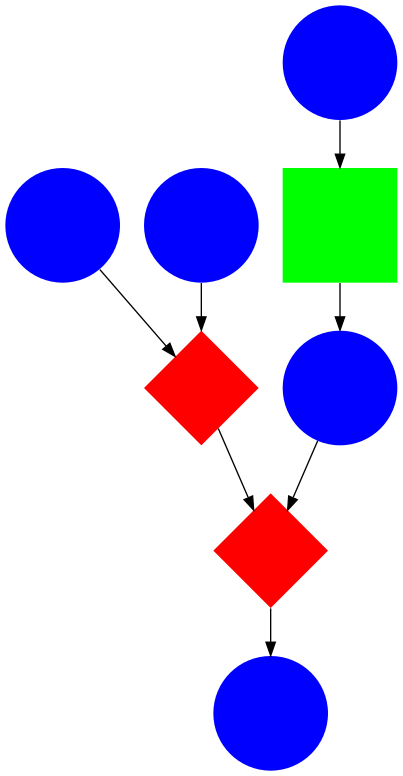

In [4]:
from PIL import Image
graph = ab.load.file("data/graphs/microtexts/nodeset6361.json")
export_graph_without_tapered(graph, "test_without_tapered.png")
Image.open("test_without_tapered.png")

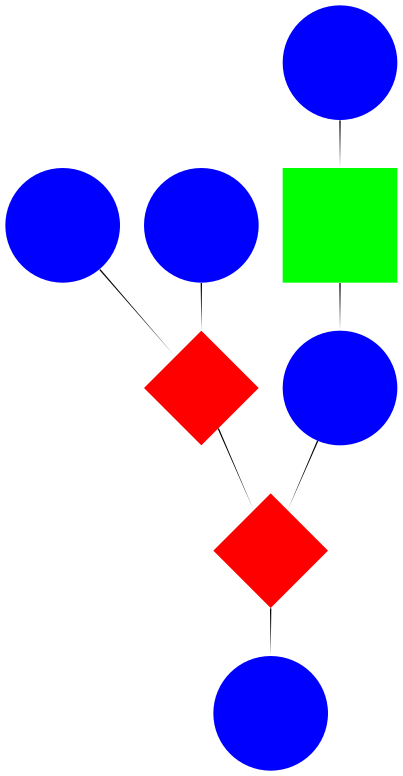

In [5]:
export_graph(graph, "orig_tapered.png")
Image.open("orig_tapered.png")

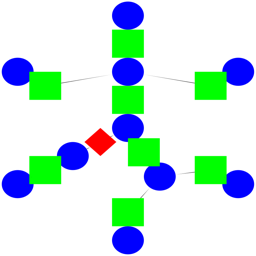

In [ ]:
i1.resize((256,256))

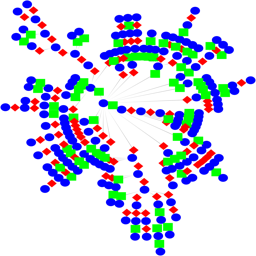

In [ ]:
i2.resize((256,256))

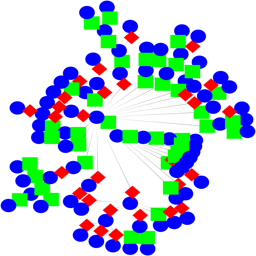

In [ ]:
example_large2 = ab.load.file("kialo-graphnli/11186.json")
export_graph(example_large2, "test/example_large2_twopi.png", layout_engine="twopi")
i3 = Image.open("test/example_large2_twopi.png")
i3.resize((256,256))

In [1]:
import os
os.chdir("data")

In [8]:
from glob import glob
from tqdm import tqdm
from PIL import Image
data_structure = {
    "train": {
        "araucaria": "json",
        "iac": "json",
        "kialo-graphnli": "json",
        "persuasive-essays": "ann",
        "qt30": "json",
        "us-2016": "json",
    },
    "val": {
        "microtexts": "json",
    }
}
FOLDER = "dot"
for split in data_structure:
    split_dir = f"{FOLDER}/{split}"
    os.makedirs(split_dir, exist_ok=True)
    for dsname, ext in data_structure[split].items():
        print(f"Processing {dsname} {split} split")
        files = glob(f"graphs/{dsname}/*.{ext}")
        for file in tqdm(files):
            try:
                path = f"{split_dir}/{dsname}-{file.split('/')[-1].split('.')[0]}.png"
                graph = ab.load.file(file)
                export_graph(graph, path, layout_engine="dot")
                i = Image.open(path)
                i = i.resize((256,256))
                i.save(path)
            except Exception as e:
                # print(f"Error processing {file}")
                print(e)
                try:
                    os.remove(path)
                except:
                    pass

Processing us-2016 train split


  4%|▍         | 22/499 [00:03<01:10,  6.75it/s]

'utf-8' codec can't decode byte 0x97 in position 378: invalid start byte


  7%|▋         | 35/499 [00:04<00:46,  9.88it/s]

'utf-8' codec can't decode byte 0x97 in position 3226: invalid start byte


 12%|█▏        | 59/499 [00:07<00:48,  9.12it/s]

'utf-8' codec can't decode byte 0x97 in position 3996: invalid start byte


 18%|█▊        | 88/499 [00:09<00:28, 14.58it/s]

'utf-8' codec can't decode byte 0x97 in position 149: invalid start byte


 20%|██        | 101/499 [00:10<00:24, 16.53it/s]

'utf-8' codec can't decode byte 0x97 in position 17: invalid start byte
'utf-8' codec can't decode byte 0x97 in position 292: invalid start byte


 23%|██▎       | 114/499 [00:11<00:36, 10.57it/s]

'utf-8' codec can't decode byte 0x97 in position 504: invalid start byte


 24%|██▎       | 118/499 [00:11<00:30, 12.34it/s]

'utf-8' codec can't decode byte 0x97 in position 907: invalid start byte


 26%|██▌       | 128/499 [00:13<00:42,  8.69it/s]

'utf-8' codec can't decode byte 0x97 in position 335: invalid start byte


 34%|███▍      | 171/499 [00:17<00:20, 16.10it/s]

'utf-8' codec can't decode byte 0x97 in position 2170: invalid start byte


 36%|███▋      | 181/499 [00:18<00:36,  8.75it/s]

'utf-8' codec can't decode byte 0x97 in position 89: invalid start byte


 40%|███▉      | 199/499 [00:20<00:21, 13.95it/s]

'utf-8' codec can't decode byte 0x92 in position 3356: invalid start byte


 43%|████▎     | 213/499 [00:21<00:29,  9.81it/s]

'utf-8' codec can't decode byte 0x97 in position 1745: invalid start byte


 45%|████▌     | 226/499 [00:22<00:17, 15.49it/s]

'utf-8' codec can't decode byte 0x96 in position 660: invalid start byte


 47%|████▋     | 236/499 [00:23<00:20, 12.92it/s]

'utf-8' codec can't decode byte 0x97 in position 1574: invalid start byte


 54%|█████▍    | 269/499 [00:26<00:16, 13.83it/s]

'utf-8' codec can't decode byte 0x97 in position 311: invalid start byte


 58%|█████▊    | 289/499 [00:29<00:27,  7.66it/s]

'utf-8' codec can't decode byte 0x97 in position 5565: invalid start byte


 66%|██████▋   | 331/499 [00:33<00:11, 14.15it/s]

'utf-8' codec can't decode byte 0x97 in position 936: invalid start byte


 68%|██████▊   | 337/499 [00:33<00:08, 18.28it/s]

'utf-8' codec can't decode byte 0x97 in position 2118: invalid start byte
'utf-8' codec can't decode byte 0x97 in position 1054: invalid start byte
'utf-8' codec can't decode byte 0x97 in position 3459: invalid start byte


 78%|███████▊  | 389/499 [00:39<00:07, 14.03it/s]

'utf-8' codec can't decode byte 0x97 in position 774: invalid start byte


 81%|████████  | 403/499 [00:40<00:07, 13.45it/s]

'utf-8' codec can't decode byte 0x97 in position 1694: invalid start byte
'utf-8' codec can't decode byte 0x97 in position 1261: invalid start byte


 85%|████████▌ | 425/499 [00:41<00:05, 13.34it/s]

'utf-8' codec can't decode byte 0x97 in position 746: invalid start byte


 89%|████████▊ | 442/499 [00:43<00:04, 12.77it/s]

'utf-8' codec can't decode byte 0x97 in position 997: invalid start byte


 91%|█████████ | 452/499 [00:43<00:02, 15.95it/s]

'utf-8' codec can't decode byte 0x97 in position 1279: invalid start byte


 97%|█████████▋| 482/499 [00:46<00:01, 15.51it/s]

'utf-8' codec can't decode byte 0x97 in position 180: invalid start byte


 99%|█████████▉| 494/499 [00:46<00:00, 18.55it/s]

'utf-8' codec can't decode byte 0xaf in position 191: invalid start byte


100%|██████████| 499/499 [00:47<00:00, 10.57it/s]


Processing microtexts val split


100%|██████████| 110/110 [00:05<00:00, 21.94it/s]


In [9]:
from glob import glob
from tqdm import tqdm
from PIL import Image
data_structure = {
    "train": {
        "araucaria": "json",
        "iac": "json",
        "kialo-graphnli": "json",
        "persuasive-essays": "ann",
        "qt30": "json",
        "us-2016": "json",
    },
    "val": {
        "microtexts": "json",
    }
}
FOLDER = "twopi"
for split in data_structure:
    split_dir = f"{FOLDER}/{split}"
    os.makedirs(split_dir, exist_ok=True)
    for dsname, ext in data_structure[split].items():
        print(f"Processing {dsname} {split} split")
        files = glob(f"graphs/{dsname}/*.{ext}")
        for file in tqdm(files):
            try:
                path = f"{split_dir}/{dsname}-{file.split('/')[-1].split('.')[0]}.png"
                graph = ab.load.file(file)
                export_graph(graph, path, layout_engine="twopi")
                i = Image.open(path)
                i = i.resize((256,256))
                i.save(path)
            except Exception as e:
                # print(f"Error processing {file}")
                print(e)
                try:
                    os.remove(path)
                except:
                    pass

Processing araucaria train split


100%|██████████| 662/662 [00:30<00:00, 21.76it/s]


Processing iac train split


100%|██████████| 1808/1808 [01:29<00:00, 20.19it/s]


Processing kialo-graphnli train split


  7%|▋         | 113/1560 [01:10<1:11:18,  2.96s/it]

Image size (218484695 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


 27%|██▋       | 421/1560 [03:43<18:21,  1.03it/s]  /home/kilian/.cache/pypoetry/virtualenvs/evaluate-cbr-Epwt-pU6-py3.10/lib/python3.10/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (154026735 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 35%|███▌      | 551/1560 [05:20<1:16:09,  4.53s/it]

Image size (189423376 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


 47%|████▋     | 734/1560 [06:53<09:18,  1.48it/s]  /home/kilian/.cache/pypoetry/virtualenvs/evaluate-cbr-Epwt-pU6-py3.10/lib/python3.10/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (156083536 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 52%|█████▏    | 811/1560 [08:10<1:37:37,  7.82s/it]

Image size (476951433 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


 67%|██████▋   | 1052/1560 [09:57<02:50,  2.99it/s] /home/kilian/.cache/pypoetry/virtualenvs/evaluate-cbr-Epwt-pU6-py3.10/lib/python3.10/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (176755152 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 77%|███████▋  | 1198/1560 [11:16<03:59,  1.51it/s]/home/kilian/.cache/pypoetry/virtualenvs/evaluate-cbr-Epwt-pU6-py3.10/lib/python3.10/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (112034670 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 96%|█████████▌| 1493/1560 [14:00<05:02,  4.52s/it]

Image size (323048760 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


100%|██████████| 1560/1560 [14:30<00:00,  1.79it/s]


Processing persuasive-essays train split


100%|██████████| 402/402 [00:36<00:00, 10.88it/s]


Processing qt30 train split


100%|██████████| 1484/1484 [01:54<00:00, 12.92it/s]


Processing us-2016 train split


  5%|▍         | 23/499 [00:02<00:40, 11.89it/s]

'utf-8' codec can't decode byte 0x97 in position 378: invalid start byte


  7%|▋         | 35/499 [00:03<00:31, 14.85it/s]

'utf-8' codec can't decode byte 0x97 in position 3226: invalid start byte


 13%|█▎        | 63/499 [00:05<00:29, 14.99it/s]

'utf-8' codec can't decode byte 0x97 in position 3996: invalid start byte


 18%|█▊        | 88/499 [00:07<00:30, 13.68it/s]

'utf-8' codec can't decode byte 0x97 in position 149: invalid start byte


 20%|██        | 101/499 [00:08<00:23, 16.82it/s]

'utf-8' codec can't decode byte 0x97 in position 17: invalid start byte
'utf-8' codec can't decode byte 0x97 in position 292: invalid start byte


 23%|██▎       | 114/499 [00:09<00:35, 10.98it/s]

'utf-8' codec can't decode byte 0x97 in position 504: invalid start byte


 24%|██▍       | 120/499 [00:09<00:24, 15.60it/s]

'utf-8' codec can't decode byte 0x97 in position 907: invalid start byte


 25%|██▌       | 127/499 [00:10<00:29, 12.45it/s]

'utf-8' codec can't decode byte 0x97 in position 335: invalid start byte


 34%|███▍      | 171/499 [00:14<00:20, 15.78it/s]

'utf-8' codec can't decode byte 0x97 in position 2170: invalid start byte


 36%|███▋      | 181/499 [00:15<00:27, 11.40it/s]

'utf-8' codec can't decode byte 0x97 in position 89: invalid start byte


 40%|████      | 201/499 [00:17<00:17, 17.37it/s]

'utf-8' codec can't decode byte 0x92 in position 3356: invalid start byte


 43%|████▎     | 213/499 [00:18<00:20, 13.78it/s]

'utf-8' codec can't decode byte 0x97 in position 1745: invalid start byte


 45%|████▍     | 223/499 [00:18<00:19, 14.07it/s]

'utf-8' codec can't decode byte 0x96 in position 660: invalid start byte


 47%|████▋     | 237/499 [00:19<00:14, 18.33it/s]

'utf-8' codec can't decode byte 0x97 in position 1574: invalid start byte


 55%|█████▍    | 273/499 [00:22<00:11, 19.10it/s]

'utf-8' codec can't decode byte 0x97 in position 311: invalid start byte


 58%|█████▊    | 289/499 [00:25<00:22,  9.36it/s]

'utf-8' codec can't decode byte 0x97 in position 5565: invalid start byte


 66%|██████▌   | 330/499 [00:28<00:10, 15.92it/s]

'utf-8' codec can't decode byte 0x97 in position 936: invalid start byte


 68%|██████▊   | 337/499 [00:28<00:09, 18.00it/s]

'utf-8' codec can't decode byte 0x97 in position 2118: invalid start byte
'utf-8' codec can't decode byte 0x97 in position 1054: invalid start byte
'utf-8' codec can't decode byte 0x97 in position 3459: invalid start byte


 78%|███████▊  | 389/499 [00:33<00:06, 16.33it/s]

'utf-8' codec can't decode byte 0x97 in position 774: invalid start byte


 80%|████████  | 401/499 [00:34<00:06, 14.55it/s]

'utf-8' codec can't decode byte 0x97 in position 1694: invalid start byte
'utf-8' codec can't decode byte 0x97 in position 1261: invalid start byte


 85%|████████▍ | 424/499 [00:35<00:04, 15.55it/s]

'utf-8' codec can't decode byte 0x97 in position 746: invalid start byte


 89%|████████▊ | 442/499 [00:36<00:03, 16.86it/s]

'utf-8' codec can't decode byte 0x97 in position 997: invalid start byte


 91%|█████████ | 454/499 [00:37<00:03, 12.95it/s]

'utf-8' codec can't decode byte 0x97 in position 1279: invalid start byte


 97%|█████████▋| 483/499 [00:39<00:01, 14.28it/s]

'utf-8' codec can't decode byte 0x97 in position 180: invalid start byte


100%|█████████▉| 497/499 [00:40<00:00, 18.65it/s]

'utf-8' codec can't decode byte 0xaf in position 191: invalid start byte


100%|██████████| 499/499 [00:40<00:00, 12.25it/s]


Processing microtexts val split


100%|██████████| 110/110 [00:04<00:00, 22.01it/s]


# Eval images (casebases)
----
generates retrieval eval case base images (microtexts) for V1 and V2

In [7]:
from glob import glob
from tqdm import tqdm
from PIL import Image
import os

CASEBASE = "microtexts"
version_dict = {
    "v1": "dot",
    "v2": "twopi"
}

FOLDER = "eval_all"
for version in version_dict:
    split_dir = f"{FOLDER}/casebase/{version}"
    os.makedirs(split_dir, exist_ok=True)
    files = glob(f"graphs/{CASEBASE}/*.json")
    for file in tqdm(files):
        try:
            path = f"{split_dir}/{file.split('/')[-1].split('.')[0]}.png"
            graph = ab.load.file(file)
            export_graph(graph, path, layout_engine=version_dict[version])
            i = Image.open(path)
            i = i.resize((256,256))
            i.save(path)
        except Exception as e:
            # print(f"Error processing {file}")
            print(e)
            try:
                os.remove(path)
            except:
                pass

100%|██████████| 110/110 [00:06<00:00, 16.75it/s]


# Eval images (queries)
----
generates retrieval eval query images (microtexts) for V1 and V2

In [5]:
from glob import glob
from tqdm import tqdm
from PIL import Image
import os

CASEBASE = "microtexts"
version_dict = {
    "v1": "dot",
    "v2": "twopi"
}
queries = ["microtexts-retrieval-complex", "microtexts-retrieval-simple"]

FOLDER = "eval_all"
for queryset in queries:
    for version in version_dict:
        split_dir = f"{FOLDER}/{queryset}/{version}"
        os.makedirs(split_dir, exist_ok=True)
        files = glob(f"retrieval_queries/{queryset}/*.json")
        for file in tqdm(files):
            try:
                path = f"{split_dir}/{CASEBASE}-{file.split('/')[-1].split('.')[0]}.png"
                graph = ab.load.file(file)
                export_graph(graph, path, layout_engine=version_dict[version])
                i = Image.open(path)
                i = i.resize((256,256))
                i.save(path)
            except Exception as e:
                # print(f"Error processing {file}")
                print(e)
                try:
                    os.remove(path)
                except:
                    pass

100%|██████████| 24/24 [00:00<00:00, 28.60it/s]
